**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [115]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.api import abline_plot

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mod', 'figure']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [157]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0,0.5,'endogenous')

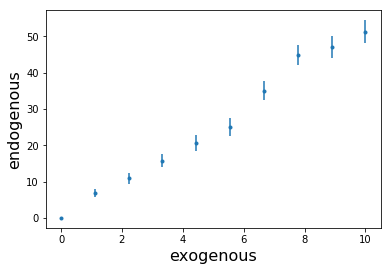

In [214]:
x = np.linspace(0, 10, 10)
plt.errorbar(x,line(5,x, errors=errors), yerr=errors(x), fmt = '.')
y = line(5,x, errors=errors)
plt.xlabel('exogenous', fontsize=16)
plt.ylabel('endogenous', fontsize=16)

# print y, x, and the result of applying statsmodels.api.add_constant() to x

# use statsmodels.api.OLS to fit x and y 
- *the wrong way*: by passing x as exogenous variable
- *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

print the model summary for each and discuss the differences

In [215]:
x

array([  0.        ,   1.11111111,   2.22222222,   3.33333333,
         4.44444444,   5.55555556,   6.66666667,   7.77777778,
         8.88888889,  10.        ])

In [216]:
y

array([  0.        ,   5.54445071,  13.50344228,  14.55821309,
        22.33199261,  28.99147754,  40.48820619,  39.00105962,
        46.68074275,  47.76194214])

In [217]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1284.
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           5.08e-11
Time:                        14:50:13   Log-Likelihood:                -23.572
No. Observations:                  10   AIC:                             49.14
Df Residuals:                       9   BIC:                             49.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             5.1466      0.144     35.837      0.000         4.822     5.471
==============================================================================
Omnibus:                        4.913   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                1.559
Skew:                           0.879   Prob(JB):                        0.459
Kurtosis:                       3.806   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
#THE RIGHT WAY
smfit = smf.OLS(y, sm.add_constant(x)).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     324.9
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           9.21e-08
Time:                        14:50:16   Log-Likelihood:                -23.510
No. Observations:                  10   AIC:                             51.02
Df Residuals:                       8   BIC:                             51.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.5294      1.669      0.317      0.759        -3.319     4.378
x1             5.0714      0.281     18.025      0.000         4.423     5.720
==============================================================================
Omnibus:                        6.253   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.221
Skew:                           1.045   Prob(JB):                        0.329
Kurtosis:                       3.983   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# plot the data (as points) and both statsmodels fits

Text(0.5,1,'Scatter Plot between exogenous and endogenous variables with statsmodels fit')

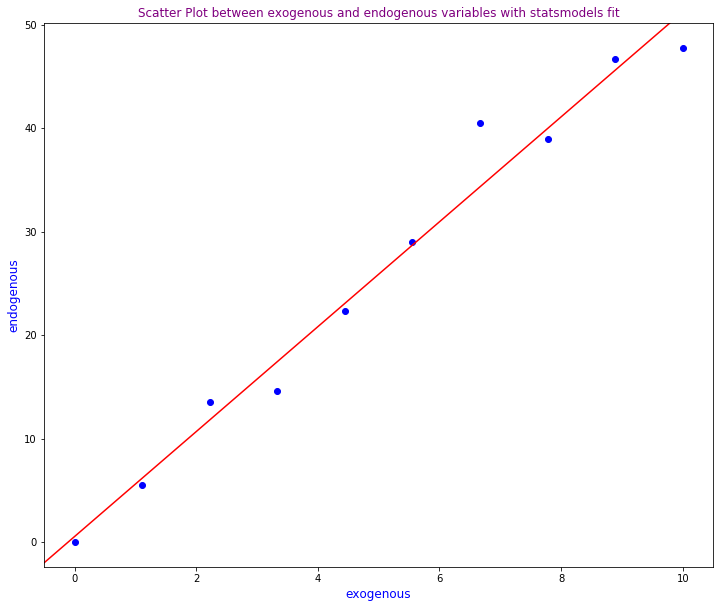

In [219]:
data = {'Xvalue': x, 'Yvalue': y}

figure, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x, y, c='b')

smfit = smf.OLS(y, sm.add_constant(x)).fit()
abline_plot(model_results=smfit, ax=ax, color='red')

plt.xlabel('exogenous', fontsize=12, color='blue')
plt.ylabel('endogenous', fontsize=12, color='blue')
plt.title('Scatter Plot between exogenous and endogenous variables with statsmodels fit', fontsize=12, color='purple')

# create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0,0.5,'endogenous')

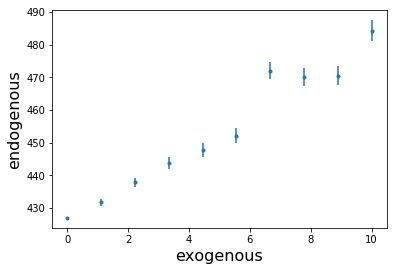

In [220]:
x = np.linspace(0, 10, 10)
plt.errorbar(x,line(5,x, b=427, errors=errors), yerr=errors(x), fmt = '.')
y = line(5,x, b=427, errors=errors)
plt.xlabel('exogenous', fontsize=16)
plt.ylabel('endogenous', fontsize=16)

# repeat step 3

In [221]:
smfit = smf.OLS(y, sm.add_constant(x)).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     225.6
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           3.81e-07
Time:                        14:51:55   Log-Likelihood:                -24.937
No. Observations:                  10   AIC:                             53.87
Df Residuals:                       8   BIC:                             54.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        427.5283      1.925    222.110      0.000       423.090   431.967
x1             4.8745      0.325     15.021      0.000         4.126     5.623
==============================================================================
Omnibus:                        0.801   Durbin-Watson:                   2.441
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.000
Skew:                           0.001   Prob(JB):                         1.00
Kurtosis:                       3.024   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# repeat step 4

Text(0.5,1,'Scatter Plot between exogenous and endogenous variables with statsmodels fit')

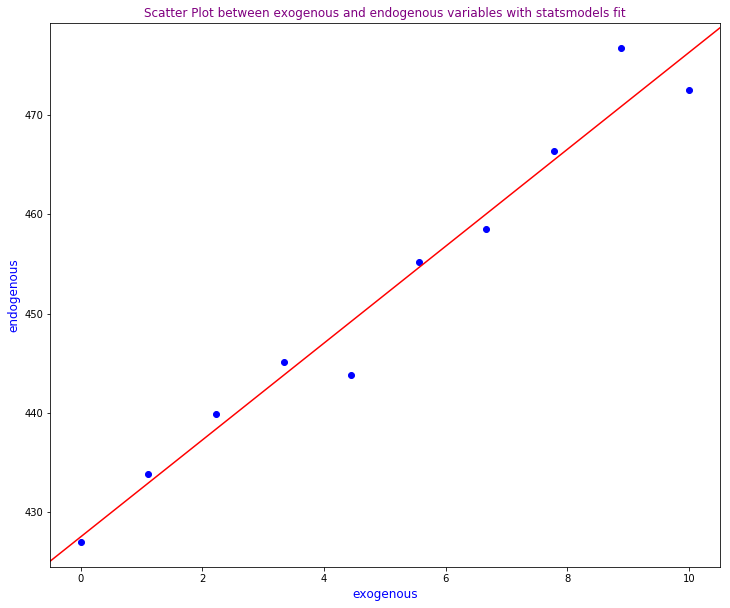

In [230]:
data = {'Xvalue': x, 'Yvalue': y}

figure, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x, y, c='b')

smfit = smf.OLS(y, sm.add_constant(x)).fit()
abline_plot(model_results=smfit, ax=ax, color='red')

plt.xlabel('exogenous', fontsize=12, color='blue')
plt.ylabel('endogenous', fontsize=12, color='blue')
plt.title('Scatter Plot between exogenous and endogenous variables with statsmodels fit', fontsize=12, color='purple')

# now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [234]:
weight = 1. / errors(y)**2

smWLS = smf.WLS(y, sm.add_constant(x), weights = weight).fit()
smWLS.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            WLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           3.53e-07
Time:                        15:04:25   Log-Likelihood:                -24.827
No. Observations:                  10   AIC:                             53.65
Df Residuals:                       8   BIC:                             54.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        427.5354      1.874    228.129      0.000       423.214   431.857
x1             4.8693      0.321     15.171      0.000         4.129     5.609
==============================================================================
Omnibus:                        0.798   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.671   Jarque-Bera (JB):                0.004
Skew:                          -0.046   Prob(JB):                        0.998
Kurtosis:                       3.019   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept

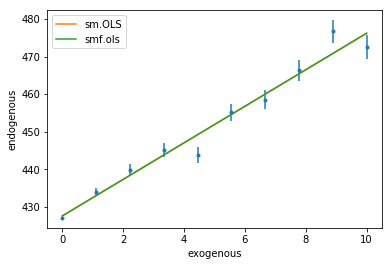

In [235]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smWLS.predict(), '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();